# USA Births Per Day binned by Month (1933-2015)

---

## Context
* Tired but can't sleep in a hotel on work travel to Pt. Mugu. 
* Wife thinks it sounds like traveling to Mt. Snoob.
* Looking for secondary data, Google finds tons of goodies to play with, including [Berkeley's link collection](http://guides.lib.berkeley.edu/publichealth/healthstatistics/rawdata).
* [Human Mortality Database](http://www.mortality.org/cgi-bin/hmd/hmd_download.php) sounds morbid enough for tonight. Turns out they have a metric shit ton of data on 30+ countries. Births is on there. Less morbid than mortality I suppose.
* Downloaded the USA data cause I live there.

## The Data
* I don't understand what the heck I just downloaded. The file tree looks like it's got a couple database types, a bunch of summary text files, some PDFs, dirs named old-old-old, etc. 
* Inside the InputDB dir there's a text file called USAbirthbymonth.txt. I bet I can guess what's in here.
* No need to guess... 

## Exploration


* I opened up the csv in Excel to see what was going on. Nothing too crazy. 
* I'll open it up here to investigate further.

In [45]:
# encoding: utf-8

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('USAbirthbymonth.txt')
df.head(15)

,PopName,Area,Year,YearReg,Month,Vital,RefCode,Access,Births,Note1,Note2,Note3,LDB
0,USA,2,1933,1933,1,1,17,O,180545,.,.,.,1
1,USA,2,1933,1933,2,1,17,O,165986,.,.,.,1
2,USA,2,1933,1933,3,1,17,O,183762,.,.,.,1
3,USA,2,1933,1933,4,1,17,O,171354,.,.,.,1
4,USA,2,1933,1933,5,1,17,O,174811,.,.,.,1
5,USA,2,1933,1933,6,1,17,O,169255,.,.,.,1
6,USA,2,1933,1933,7,1,17,O,180880,.,.,.,1
7,USA,2,1933,1933,8,1,17,O,181856,.,.,.,1
8,USA,2,1933,1933,9,1,17,O,167637,.,.,.,1
9,USA,2,1933,1933,10,1,17,O,167055,.,.,.,1


* Well hey it worked. Excellent...
* Already cool. Immediately only care about 3 columns: Year, Month, Births
* I'll investigate the other ones later, maybe.
* Looks like the data has a subtotal every year. That's annoying, let's kill it.


* [Looks like isin will get us there.](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html)
* And we can index using [this nice example.](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-with-isin)
* [And this answer takes us all the way.](https://stackoverflow.com/a/22485573)
* Gotta assign that bad boy to a new variable. 
    * I'll save off the original DataFrame just in case.

In [46]:
df_BAK = df
df = df[~df.Month.isin(['TOT'])]
df[10:14]

,PopName,Area,Year,YearReg,Month,Vital,RefCode,Access,Births,Note1,Note2,Note3,LDB
10,USA,2,1933,1933,11,1,17,O,165939,.,.,.,1
11,USA,2,1933,1933,12,1,17,O,172152,.,.,.,1
13,USA,2,1934,1934,1,1,17,O,182698,.,.,.,1
14,USA,2,1934,1934,2,1,17,O,166452,.,.,.,1


* Heck yeah!


* Okay, let's put this into a heatmap 2D format:
    * One month per row starting with 1
    * One year per column starting with 1933
* ~~Use the [length of the index column to count rows](https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe)~~
* ~~Use [itertuples](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples)~~
* Duh make a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)
* Gotta fix the [leading zero ordering](https://stackoverflow.com/a/36346221) FIXME


In [47]:
df_pivot = pd.pivot_table(df, index='Month', columns='Year', values='Births', aggfunc=np.sum)
months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df_pivot = df_pivot.reindex_axis(months, axis=0)
df_pivot.head(12)

Year,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,,,,,,,,,
1,180545,182698,186051,182221,182232,194557,192416,194247,205011,224251,...,340297,354943,356457,337980,323249,320477,316315,323691,326366,325955
2,165986,166452,171058,176711,170698,180052,176904,188279,190876,208149,...,319235,326891,338521,316641,301994,297961,304505,291748,298404,298058
3,183762,179065,185375,188522,189650,196177,196123,198090,211875,227012,...,356786,360828,350630,347803,338613,330151,324322,320529,323572,328923
4,171354,168671,172177,170489,175708,184263,182990,186743,200781,209363,...,329809,338224,346397,337272,325028,313275,306700,311645,318990,320832
5,174811,179021,174705,170479,181023,188010,182774,194123,198270,213594,...,355437,362319,354886,345257,328273,326647,330146,329520,334613,327917
6,169255,175044,178786,176341,177588,183822,181809,192404,211120,217609,...,358251,358606,348587,346971,334535,337280,327189,319779,325981,330541
7,180880,187768,191888,190986,195407,203183,200553,210125,234239,239127,...,367934,379616,375384,368450,345199,345560,347542,349158,355524,353415
8,181856,195393,192449,190494,201292,205742,203754,213669,229428,249525,...,387798,390378,373333,359554,349747,359404,361114,353485,354257,351791
9,167637,192412,185218,183819,192513,196692,197814,206103,215232,257448,...,374711,366904,367965,361922,350745,345548,340113,338008,348424,347516


* It worked. Nice.

## Normalization

* HOWEVER, normalization is the key to make all this look nice.
* As pointed out on Reddit, the number of days in a month can have a drastic affect, if only one day is missing (30 vs 31) then the count can be affected significantly.
* To normalize, the # of births in a given month is divided by the number of days in that month.
* To do this, I'm going to need a table that has the number of days for each month. I'm just going to make it manually in Excel using the info from here: https://landweb.modaps.eosdis.nasa.gov/browse/calendar.html

In [48]:
df_days = pd.DataFrame.from_csv('days_of_month.txt')
df_days.head(12)

,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Month,,,,,,,,,,,,,,,,,,,,,
1,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
2,28,28,28,29,28,28,28,29,28,28,...,28,28,29,28,28,28,29,28,28,28
3,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
4,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
5,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
6,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
7,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
8,31,31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
9,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


* Great, notice the leap years


* Want to rename the columns though after dividing the values...

In [49]:
df_pivot.columns

Int64Index([1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
            1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
            1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
            1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
            1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
            1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', name=u'Year')

* Could not get my DataFrames to divide, just resulted in NaNs
* Going to use values to do it, then go back to a DataFrame

In [50]:
c = df_pivot.values / df_days.values
df_norm_all = pd.DataFrame(data=c, columns=df_pivot.columns, index=months)
df_norm = df_norm_all.loc[:,'1940':]
df_norm

Year,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
1,6266,6613,7233,8450,7599,7631,7184,10982,9532,9653,...,10977,11449,11498,10902,10427,10337,10203,10441,10527,10514
2,6492,6817,7433,8467,7692,7667,7370,10783,9851,9756,...,11401,11674,11673,11308,10785,10641,10500,10419,10657,10644
3,6390,6834,7322,8231,7352,7451,7365,10507,9692,9681,...,11509,11639,11310,11219,10923,10650,10462,10339,10437,10610
4,6224,6692,6978,7855,7097,7167,7354,9745,9254,9025,...,10993,11274,11546,11242,10834,10442,10223,10388,10633,10694
5,6262,6395,6890,7632,7159,7160,7530,9789,8783,9083,...,11465,11687,11447,11137,10589,10537,10649,10629,10793,10577
6,6413,7037,7253,7995,7676,7483,8076,10063,8923,9514,...,11941,11953,11619,11565,11151,11242,10906,10659,10866,11018
7,6778,7556,7713,8343,8191,7772,9236,10269,9935,10265,...,11868,12245,12109,11885,11135,11147,11211,11263,11468,11400
8,6892,7400,8049,8418,8150,7843,10086,10312,10353,10412,...,12509,12592,12043,11598,11282,11593,11648,11402,11427,11348
9,6870,7174,8581,8372,7913,7881,10849,10338,10417,10420,...,12490,12230,12265,12064,11691,11518,11337,11266,11614,11583
10,6411,6692,8567,7864,7615,7450,10951,9952,9926,10047,...,11850,11913,11544,11213,10864,10596,11145,10985,11076,10935



## Visualization

* Now the whole friggin point is to make a chart. 

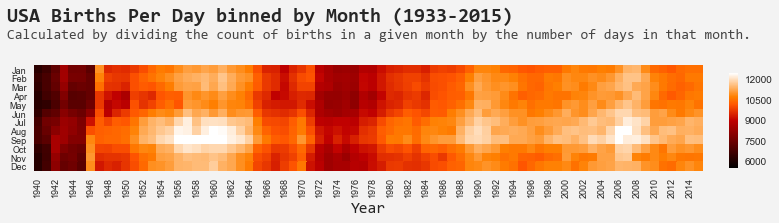

In [51]:
sns.set()

fig, ax = plt.subplots(figsize=(12, 4))
cbar_ax = fig.add_axes([0.93, .33, .01, .33])
sns.heatmap(df_norm,
            ax = ax,
            cbar_ax = cbar_ax,
            yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            xticklabels=2,
            vmin = 5500,
            vmax = 12500,
            cmap="gist_heat",
            square=True,
            cbar=True)
ax.set_xlabel('Year',
              fontsize=16,
              fontname = 'Consolas')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=9)
fig.set_facecolor('#f3f3f3') 


# Chart titles
ax.text(-3, -5,
        'USA Births Per Day binned by Month (1933-2015)',
        fontsize = 20,
        weight = 'bold',
        fontname = 'Consolas')
ax.text(-3, -3,
        'Calculated by dividing the count of births in a given month by the number of days in that month.',
        fontsize = 14,
        alpha = .85,
        fontname = 'Consolas')

fig.savefig('USA_Births_Per_Day_binned_by_Month.jpg', dpi=200, bbox_inches='tight', pad_inches=.11)

* Awwww yeahhhh

* Well, the wife thinks the colors should be inverted. It shall be done.
* Also going to start at 1939 to try and get out of the Great Depression for better highs/lows later.

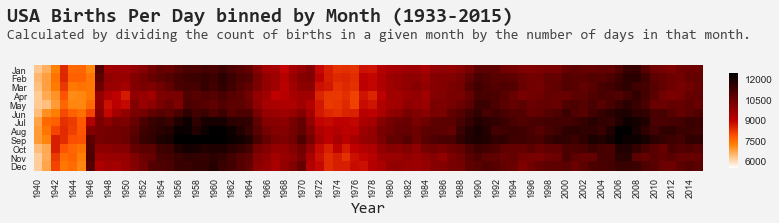

In [52]:
sns.set()

fig, ax = plt.subplots(figsize=(12, 4))
cbar_ax = fig.add_axes([0.93, .33, .01, .33])
sns.heatmap(df_norm,
            ax = ax,
            cbar_ax = cbar_ax,
            yticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            xticklabels=2,
            vmin = 5500,
            vmax = 12500,
            cmap="gist_heat_r",
            square=True,
            cbar=True)
ax.set_xlabel('Year',
              fontsize=16,
              fontname = 'Consolas')
ax.set_ylabel('')
ax.tick_params(axis='both', which='major', labelsize=9)
fig.set_facecolor('#f3f3f3') 


# Chart titles
ax.text(-3, -5,
        'USA Births Per Day binned by Month (1933-2015)',
        fontsize = 20,
        weight = 'bold',
        fontname = 'Consolas')
ax.text(-3, -3,
        'Calculated by dividing the count of births in a given month by the number of days in that month.',
        fontsize = 14,
        alpha = .85,
        fontname = 'Consolas')

fig.savefig('USA_Births_Per_Day_binned_by_Month_r.jpg', dpi=200, bbox_inches='tight', pad_inches=.11)

## Conclusion

* Definitely need to normalize this by capita as well. FIXME
* Purely a quick-and-dirty visual analysis, statistics aren't good for me when I'm sleepy so I'll come back to that. FIXME
* That baby boomer spike is so nicely timed with WWII that it's amazing. The war ended on September 2, 1945 and nine months later is June 1946, precisely when the births start **heating** up.
* As pointed out by some Redditors, it is possible that 'echos' from the baby boomers show up every 20ish years.
* Big drop off from 1971-ish through 1978-ish. Curious to see what war/economy/politics were going on then.
* July through October has higher birth months, likely due to more banging during the winter.
* February has a streak of low numbers, wonder if the shorter number of days is a contributing factor?
* November also has a low number sreak, which surprises me because I figured 9 months after February (Valentine's Day) would have a spike.
* Interesting trend up during 1942/1943... Starts increasing in August/September 1942 which is 9 months after the attack on Pearl Harbor (Dec 7, 1941). Possibly putting a bun in the oven before heading off to war?
* Hey this is fun making guesses based on a chart!


* Let's take a look at the describe() output for each month of the pivot table (transposed):

In [53]:
df_describe = df_norm.T.describe(percentiles=[0.5])

pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_describe

,1,2,3,4,5,6,7,8,9,10,11,12
count,76,76,76,76,76,76,76,76,76,76,76,76
mean,9890,10113,10063,9833,9906,10233,10659,10820,10970,10408,10124,10133
std,1149,1181,1208,1236,1274,1266,1230,1249,1290,1217,1177,1195
min,6266,6492,6390,6224,6262,6413,6778,6892,6870,6411,6190,6198
50%,10198,10416,10372,10240,10294,10704,11139,11214,11284,10667,10459,10496
max,11498,11696,11639,11546,11687,11953,12258,12652,12911,12137,11788,11795


* Seeing this little table makes me want to plot more but it's time for bed. ...violin plots for each month? bar chart of monthly means?